<a href="https://colab.research.google.com/github/bharti0420/Air-Pollution-Detection-Prediction/blob/master/effect_of_stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install arch


In [0]:
from pandas import DataFrame
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import *
import csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']=10,6

In [0]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import coint, adfuller, kpss

In [0]:
from arch.unitroot import PhillipsPerron

### load delhi_data.csv file

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
file_name="delhi_data.csv"

for fn in uploaded.keys():
  file_name=fn
print(file_name)

delhi_data.csv


In [0]:
df=pd.read_csv(file_name)
print(len(df))

34319


## 1. Stationary check on without pre-processing(cleaning & filter) data 

#### (A)  Define ADF test

In [0]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts['Raw Conc.'], autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
TestStationaryAdfuller(df)

Test Statistic                -1.087023e+01
p-value                        1.374472e-19
#Lags Used                     5.000000e+01
Number of Observations Used    3.426800e+04
Critical Value (1%)           -3.430541e+00
Critical Value (5%)           -2.861624e+00
Critical Value (10%)          -2.566815e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#### (B) Define Kwiatkowski, Phillips, Schmidt and Shin (KPSS) test

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [0]:
def TestStationaryKPSS(ts, cutoff=0.01):
    print ('Results of KPSS Test:')
    kpsstest = kpss(ts, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [0]:
TestStationaryKPSS(df['Raw Conc.'])

Results of KPSS Test:
Test Statistic            6.373483
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Test for stationarity: **

---


    If the test statistic is greater than the critical value, we reject the null hypothesis (i.e series is not stationary).
    If the test statistic is less than the critical value, if fail to reject the null hypothesis (i.e series is stationary).
    For the air Raw Conc. data, the value of the test statistic is greater than the critical value at all confidence intervals, 
    and hence we can say that the series is not stationary. ***italicized text***

#### (C) Test Stationary by Visualization

In [0]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df)

#### (D) Phillips–Perron test

In [0]:
def TestStationaryPP(ts, cutoff=0.01):
    print ('Results of PP Test:')
    pptest = PhillipsPerron(ts)
    print(pptest)

In [0]:
TestStationaryPP(df['Raw Conc.'])

Results of PP Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -80.474
P-value                         0.000
Lags                               52
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 2. Stationary check on cleaned & filter data 

In [0]:
file_name1="data.csv"
with open(file_name,'r') as fin, open(file_name1,'w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    for i in reader:
        if float(i[-1]) < 500 and  float(i[-1])>=0:
            writer.writerow(i)
        else:
            i[-1]=0
            writer.writerow(i)
file_n="time_con.csv"

#remove starting null values
with open(file_name1,'r') as fin, open(file_n,'w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    flag=0
    value=186
    for i in reader:
        if (float(i[-1])==0 and flag==0):
            pass
        elif(float(i[-1]==0)):
            i[-1]=value
            writer.writerow(i)
        else:
            flag=1
            value=i[-1]
            writer.writerow(i)            
df_data=pd.read_csv(file_n)
df_data.rename(columns={'Date (LT)': 'date'},inplace=True)
df_data['date'] = pd.to_datetime(df_data.date)
#df_data.to_csv(file_name,index=False)
df=df_data.set_index(['date'])
print(len(df))

33019


#### (A) ADF test

In [0]:
TestStationaryAdfuller(df)

Test Statistic                -8.418101e+00
p-value                        2.017885e-13
#Lags Used                     5.200000e+01
Number of Observations Used    3.296600e+04
Critical Value (1%)           -3.430548e+00
Critical Value (5%)           -2.861628e+00
Critical Value (10%)          -2.566817e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#### (B) KPSS test

In [0]:
TestStationaryKPSS(df['Raw Conc.'])

Results of KPSS Test:
Test Statistic            1.024525
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Result of KPSS test:**
    For the air Raw Conc. data, the value of the test statistic is greater than the critical value at all confidence intervals, 
    and hence we can say that the series is not stationary.

#### (C) Test Stationary by Visualization

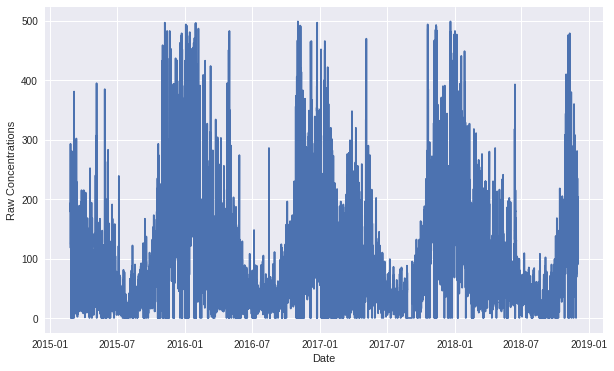

In [0]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df)

#### (D) Phillips–Perron test

In [0]:
TestStationaryPP(df['Raw Conc.'])

Results of PP Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -50.006
P-value                         0.000
Lags                               52
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 3. Stationary check on cleaning & filter data and Resample data on DAILY Basis

In [0]:
df_D=df.resample('D').mean()
df_D.dropna(inplace=True)
print(len(df_D))

1376


#### (A) ADF test

In [0]:
TestStationaryAdfuller(df_D)

Test Statistic                   -2.517817
p-value                           0.111199
#Lags Used                       23.000000
Number of Observations Used    1352.000000
Critical Value (1%)              -3.435196
Critical Value (5%)              -2.863680
Critical Value (10%)             -2.567909
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### (B) KPSS test

In [0]:
TestStationaryKPSS(df_D['Raw Conc.'])

Results of KPSS Test:
Test Statistic            0.113679
p-value                   0.100000
Lags Used                24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


**Result of KPSS test:**
    For the air Raw Conc. data, the value of the test statistic is less than the critical value at all confidence intervals, 
    and hence we can say that the series is stationary.

#### (C) Test Stationary by Visualization

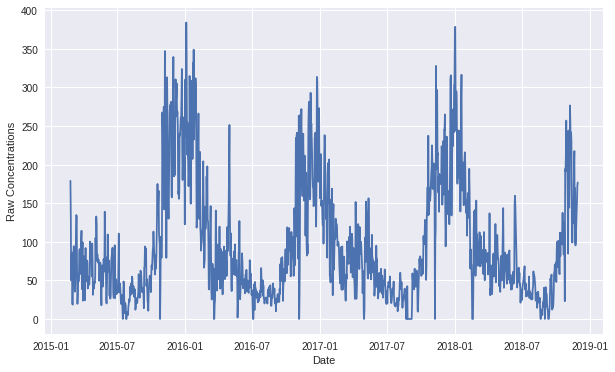

In [0]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df_D)

#### (D) Phillips–Perron test

In [0]:
TestStationaryPP(df_D['Raw Conc.'])

Results of PP Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -11.210
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 3. Stationary check on cleaned & filter data and Resample dataset on Weekly Basis

In [0]:
df_W=df.resample('W').mean()
df_W.dropna(inplace=True)
print(len(df_W))

197


#### (A) ADF test

In [0]:
TestStationaryAdfuller(df_W)

Test Statistic                  -4.068030
p-value                          0.001093
#Lags Used                       9.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#### (B) KPSS test

In [0]:
TestStationaryKPSS(df_W['Raw Conc.'])

Results of KPSS Test:
Test Statistic            0.040792
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


**Result of test:**
    For the air Raw Conc. data, the value of the test statistic is less than the critical value at all confidence intervals, 
    and hence we can say that the series is stationary.

#### (C) Test Stationary by Visualization

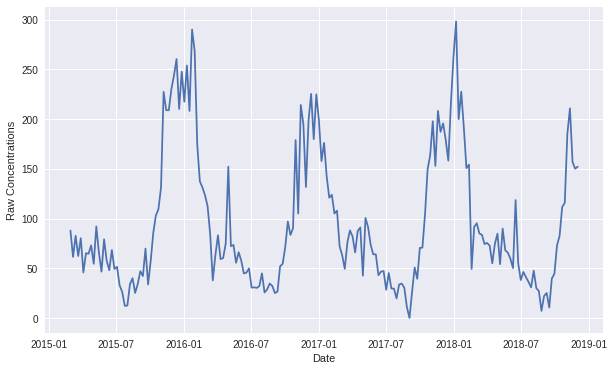

In [0]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df_W)

#### (D) Phillips–Perron test

In [0]:
TestStationaryPP(df_W['Raw Conc.'])

Results of PP Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.630
P-value                         0.005
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## 3. Stationary check on cleaned & filter data and Resample dataset on Monthly Basis

In [0]:
df_M=df.resample('M').mean()
df_M.dropna(inplace=True)
print(len(df_M))

46


#### (A) ADF test

In [0]:
TestStationaryAdfuller(df_M)

Test Statistic                 -1.368940
p-value                         0.597073
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### (B) KPSS test

In [0]:
TestStationaryKPSS(df_M['Raw Conc.'])

Results of KPSS Test:
Test Statistic            0.172061
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


**Result of KPSS test:**
    For the air Raw Conc. data, the value of the test statistic is less than the critical value at all confidence intervals, 
    and hence we can say that the series is stationary.

#### (C) Test Stationary by Visualization

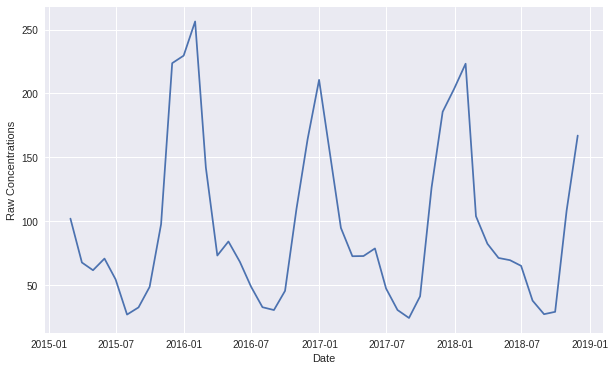

In [0]:
plt.xlabel("Date")
plt.ylabel("Raw Concentrations")
plt.plot(df_M)

#### (D) Phillips–Perron test

In [0]:
TestStationaryPP(df_M['Raw Conc.'])

Results of PP Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.349
P-value                         0.606
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.58 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
